## Behavior: Emotional rating

In [1]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
from scipy.stats import rankdata
import seaborn as sns
from statsmodels.stats.anova import AnovaRM
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='grade3') 
from Function import get_tril_vec

# define data path
data_path = 'F:/1_Emotion_Data/Data/Behavior/Data/Rating/'
result_path = 'F:/1_Emotion_Data/Results/'

### Subject list
sub_ag = [1, 2] + list(range(4,12)) + [13,14,16,17] + list(range(19,24)) + [25,26,28,29,30,31] + list(range(33,43)) + [46] # 36
sub_ax = list(range(1,5)) + list(range(7,17)) + [19,20,21,22,23,25,26,28,29,30,31] + list(range(33,42)) + [43,44,45,46] # 38
sub_fe = list(range(1,13)) + [14,17,19,20,21,22,23] + [25,26,28,29,30,31] + list(range(33,41)) + [42,44,45,46] # 37
sub_hl = [1,2] + list(range(4,18)) + [19,20,21,22,23,25,26,28,29,30,31] + list(range(33,42)) + [43,44,46] # 39
sub_ha = list(range(1,18)) + [19,20,21,22,23,25,26,28,29,31] + list(range(33,47)) # 41

C:\Users\Lenovo\anaconda3\envs\EEG\lib\site-packages\nilearn\input_data\__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


In [2]:
rating = pd.read_csv(os.path.join(data_path, 'Rating.csv'))

In [3]:
ag_df = pd.concat([rating.iloc[1:,5:9], rating.iloc[1:,25:29], rating.iloc[1:,45:49]],  axis=1)
ax_df = pd.concat([rating.iloc[1:,17:21], rating.iloc[1:,33:37], rating.iloc[1:,53:57]],  axis=1)
fe_df = pd.concat([rating.iloc[1:,13:17], rating.iloc[1:,29:33], rating.iloc[1:,49:53]],  axis=1)
hl_df = pd.concat([rating.iloc[1:,1:5], rating.iloc[1:,21:25], rating.iloc[1:,41:45]],  axis=1)
ha_df = pd.concat([rating.iloc[1:,9:13], rating.iloc[1:,37:41], rating.iloc[1:,57:61]],  axis=1)

In [4]:
def get_df(rating_df):
    ag_df = pd.concat([rating_df.iloc[1:,5:9], rating_df.iloc[1:,25:29], rating_df.iloc[1:,45:49]],  axis=1)
    ax_df = pd.concat([rating_df.iloc[1:,17:21], rating_df.iloc[1:,33:37], rating_df.iloc[1:,53:57]],  axis=1)
    fe_df = pd.concat([rating_df.iloc[1:,13:17], rating_df.iloc[1:,29:33], rating_df.iloc[1:,49:53]],  axis=1)
    hl_df = pd.concat([rating_df.iloc[1:,1:5], rating_df.iloc[1:,21:25], rating_df.iloc[1:,41:45]],  axis=1)
    ha_df = pd.concat([rating_df.iloc[1:,9:13], rating_df.iloc[1:,37:41], rating_df.iloc[1:,57:61]],  axis=1)
    return ag_df, ax_df, fe_df, hl_df, ha_df

In [5]:
def rating_mean(df):
    ag, ax, fe, hl = [], [], [], []
    for i in range(df.shape[0]):
        tp = np.array(df.iloc[i,:])
        tp = np.array(tp, dtype=[('O', np.float)]).astype(np.float)
        a = tp[[0,4,8]]
        b = tp[[1,5,9]]
        c = tp[[2,6,10]]
        d = tp[[3,7,11]]
        ag.append(a.mean())
        ax.append(b.mean())
        fe.append(c.mean())
        hl.append(d.mean())
    summary = {'angry': ag, 'anxious': ax, 'fearful':fe, 'helpless': hl}
    summary = pd.DataFrame(summary)
    return summary

In [6]:
ag_summary = rating_mean(ag_df).T
ax_summary = rating_mean(ax_df).T
fe_summary = rating_mean(fe_df).T
hl_summary = rating_mean(hl_df).T

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_21120/3896132068.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  tp = np.array(tp, dtype=[('O', np.float)]).astype(np.float)


In [7]:
for i in range(42):
    if i ==0:
        ag_meta = ag_summary.iloc[:,0]
        ag_meta = ag_meta.to_frame()
        ag_meta['sub'] = '1'
        ag_meta.columns = ['score', 'sub']
        
        ax_meta = ax_summary.iloc[:,0]
        ax_meta = ax_meta.to_frame()
        ax_meta['sub'] = '1'
        ax_meta.columns = ['score', 'sub']
        
        fe_meta = fe_summary.iloc[:,0]
        fe_meta = fe_meta.to_frame()
        fe_meta['sub'] = '1'
        fe_meta.columns = ['score', 'sub']
        
        hl_meta = hl_summary.iloc[:,0]
        hl_meta = hl_meta.to_frame()
        hl_meta['sub'] = '1'
        hl_meta.columns = ['score', 'sub']
    else:
        tp = ag_summary.iloc[:,i] 
        tp = tp.to_frame()
        tp['sub'] = i+1
        tp.columns = ['score', 'sub']
        ag_meta = pd.concat([ag_meta, tp], axis=0)
        
        tp = ax_summary.iloc[:,i] 
        tp = tp.to_frame()
        tp['sub'] = i+1
        tp.columns = ['score', 'sub']
        ax_meta = pd.concat([ax_meta, tp], axis=0)
        
        tp = fe_summary.iloc[:,i] 
        tp = tp.to_frame()
        tp['sub'] = i+1
        tp.columns = ['score', 'sub']
        fe_meta = pd.concat([fe_meta, tp], axis=0)
        
        tp = hl_summary.iloc[:,i] 
        tp = tp.to_frame()
        tp['sub'] = i+1
        tp.columns = ['score', 'sub']
        hl_meta = pd.concat([hl_meta,tp], axis=0)


ag_meta['cat'] = ag_meta.index 
ag_meta['target'] = 'angry'

ax_meta['cat'] = ax_meta.index 
ax_meta['target'] = 'anxious'

fe_meta['cat'] = fe_meta.index 
fe_meta['target'] = 'fearful'

hl_meta['cat'] = hl_meta.index 
hl_meta['target'] = 'helpless'

rating_meta = pd.concat([ag_meta, ax_meta, fe_meta, hl_meta])

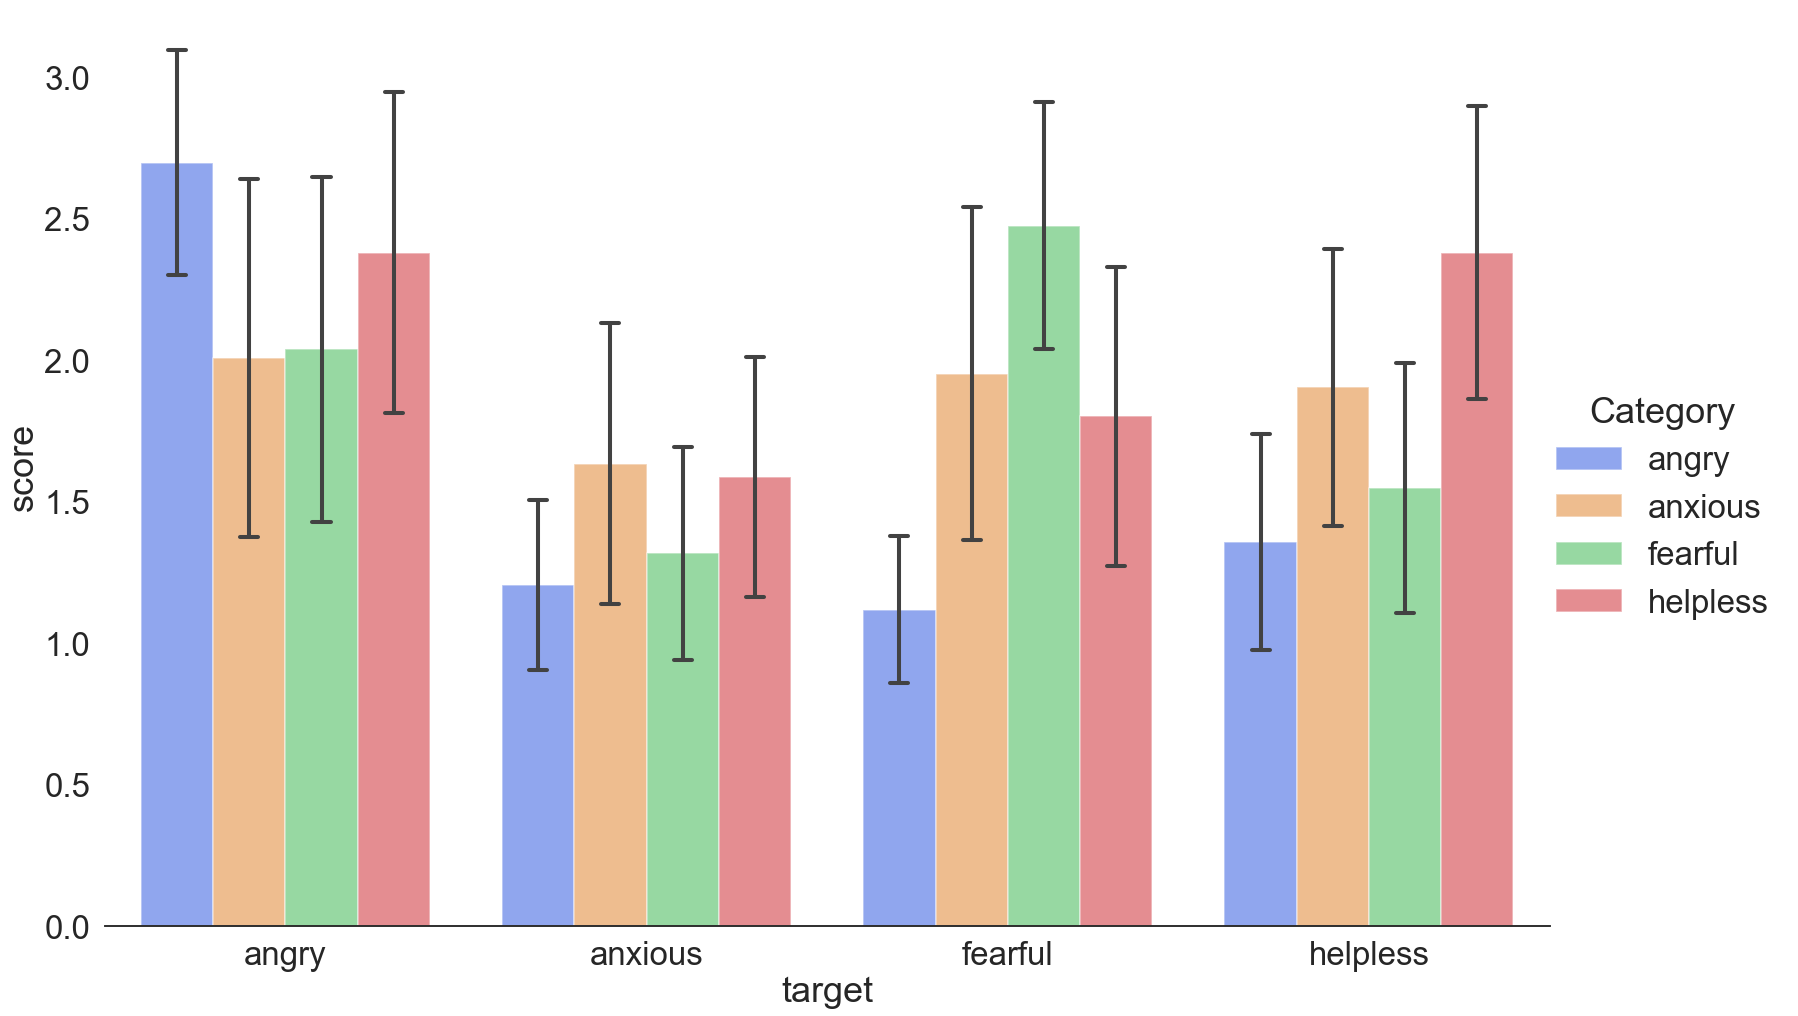

In [13]:
#sns.set_theme(style="white", context="talk", font_scale=2)
ax = sns.catplot(data=rating_meta, kind="bar", x="target", y="score", hue="cat",ci='sd', palette="bright", alpha=.5, height=15, aspect=1.5, capsize=.05)
ax.despine(left=True)
#ax.set_axis_labels("Target emotion", "Rating score")
ax.legend.set_title("Category")
#ax.fig.suptitle('Emotional behavioral rating')
#ax.savefig(os.path.join(result_path,'behav_rating.png'),bbox_inches='tight',dpi=600,pad_inches=0.1)

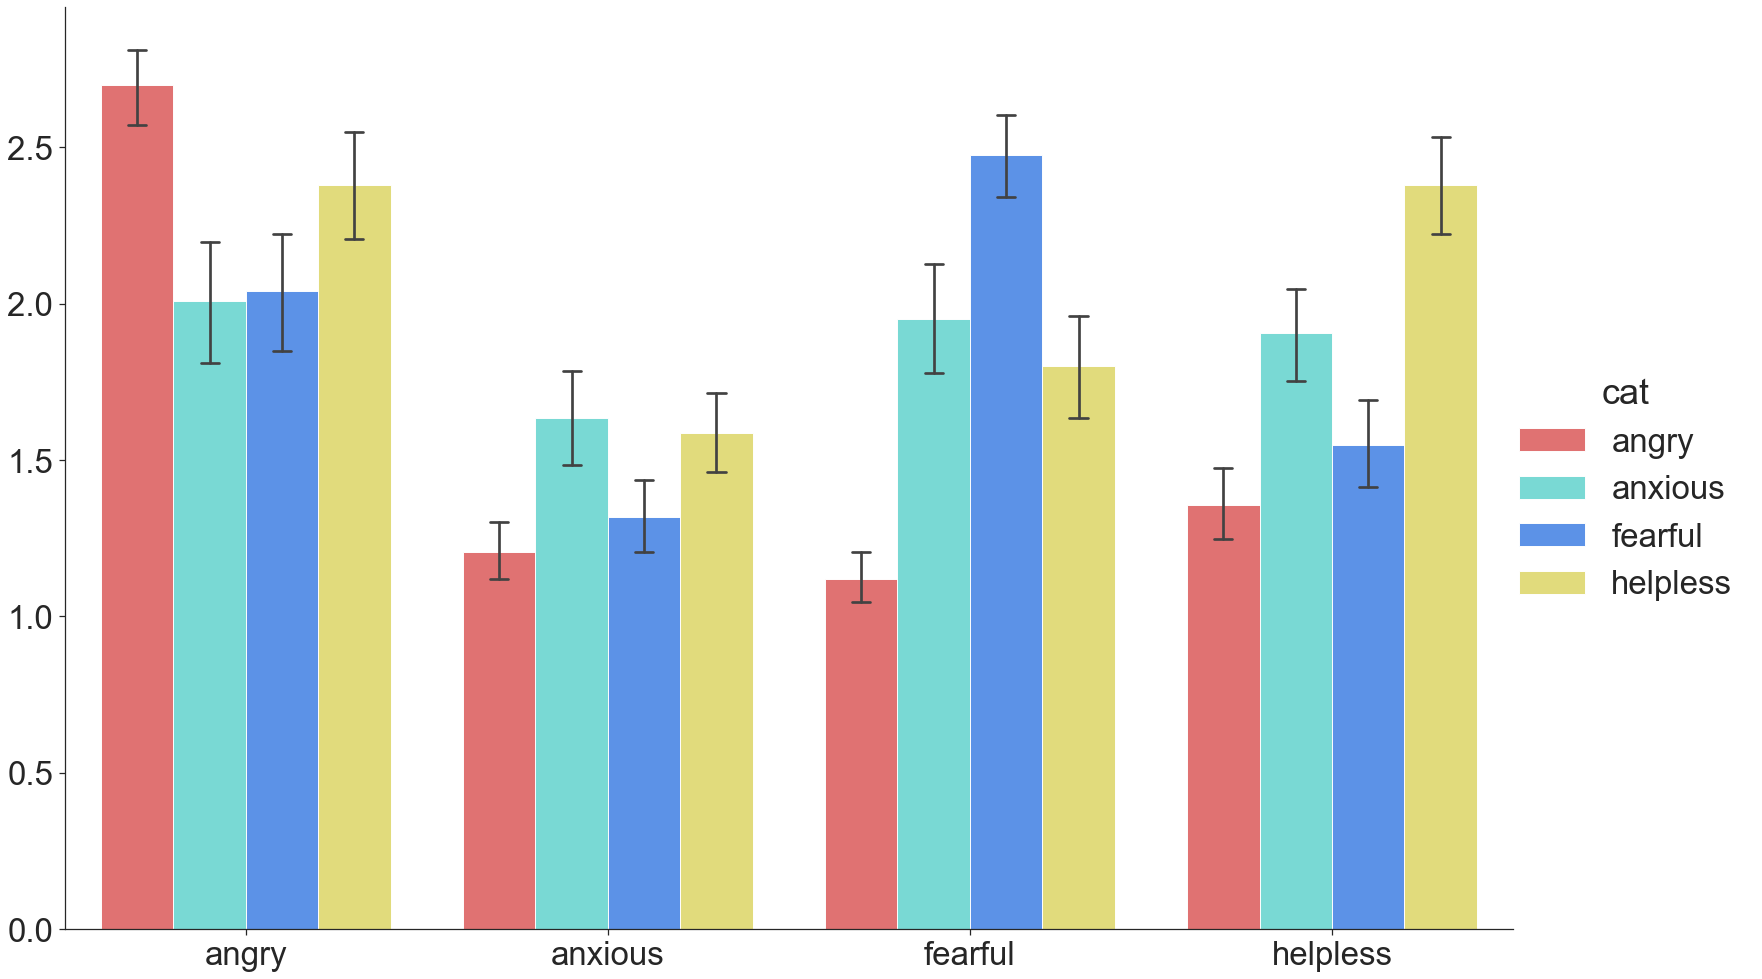

In [74]:
sns.set_theme(style="ticks",font_scale=3)
plot = sns.catplot(data=rating_meta, kind="bar", x="target", y="score", hue="cat",n_boot=5000, palette=dict(angry="#F25757", anxious="#61E8E1", fearful="#3A86FF", helpless='#F2E863'), alpha=0.95,
        height=15, aspect=1.5, capsize=.05, legend_out=True)
plot.set(xlabel=None)
plot.set(ylabel=None)
plt.savefig(os.path.join(result_path,'behav_rating.png'),bbox_inches='tight',dpi=600,pad_inches=0.1)

Summary score correlation

In [71]:
rating_ag = pd.read_csv(os.path.join(data_path, 'Rating_ag.csv'))
rating_ax = pd.read_csv(os.path.join(data_path, 'Rating_ax.csv'))
rating_fe = pd.read_csv(os.path.join(data_path, 'Rating_fe.csv'))
rating_hl = pd.read_csv(os.path.join(data_path, 'Rating_hl.csv'))
rating_ha = pd.read_csv(os.path.join(data_path, 'Rating_ha.csv'))

In [79]:
ag_df1 ,ag_df2 ,ag_df3, ag_df4, ag_df5 = get_df(rating_ag)
ax_df1 ,ax_df2 ,ax_df3, ax_df4, ax_df5 = get_df(rating_ax)
fe_df1 ,fe_df2 ,fe_df3, fe_df4, fe_df5 = get_df(rating_fe)
hl_df1 ,hl_df2 ,hl_df3, hl_df4, hl_df5 = get_df(rating_hl)

In [104]:
ag_score = np.array(rating_mean(ag_df1)['ag_mean'])
ax_score = np.array(rating_mean(ax_df2)['ax_mean'])
fe_score = np.array(rating_mean(fe_df3)['fe_mean'])
hl_score = np.array(rating_mean(hl_df4)['hl_mean'])

rating_score = [ag_score, ax_score, fe_score, hl_score]
np.save(os.path.join(result_path, 'rating_score.npy'), rating_score) 

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_2692/1945996342.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  tp = np.array(tp, dtype=[('O', np.float)]).astype(np.float)
C:\Users\Lenovo\anaconda3\envs\EEG\lib\site-packages\numpy\lib\npyio.py:518: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)
